#Cuartiles y percentiles con alguna distribución





### Asignación

[Articulo Referencia](https://www.researchgate.net/publication/262457253_Development_and_validation_of_a_diagrammatic_scale_to_evaluate_cercospora_leaf_spot_in_watermelon/figures?lo=1)

1. Generar unos datos de la dostribución log-normal, con un promedio de daño del **8%** y una desviación estandar de **3.6** (si algún valor es negativo se convierte a 0)
2. Extraer media, mediana, quartiles y percentiles (desde 5% hasta 95% cada 5)
3. Categorizar la variable según la escala diagramtica del *articulo referencia*
4. En que posición de debo ubicarme en la escala para estimar la severidad real

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

In [22]:
np.random.seed(123)

mu, sigma = 8/100, 3.6 # promedio y desviación estandár
s = np.random.lognormal(mu, sigma, 1000)
df_s = pd.DataFrame(s,columns=['porcentaje_daño'])

In [23]:
df_s

,porcentaje_daño
0,0.021747
1,39.269322
2,3.000331
3,0.004783
4,0.134935
...,...
995,10.645607
996,50.993948
997,0.041025
998,5.888195


In [24]:
print("valores menores a cero", 
      df_s[df_s['porcentaje_daño']<0].count()) 


valores menores a cero porcentaje_daño    0
dtype: int64


In [25]:
df_s.loc[df_s.porcentaje_daño<0,"porcenraje_daño_menor"]=0
df_s

,porcentaje_daño,porcenraje_daño_menor
0,0.021747,NaN
1,39.269322,NaN
2,3.000331,NaN
3,0.004783,NaN
4,0.134935,NaN
...,...,...
995,10.645607,NaN
996,50.993948,NaN
997,0.041025,NaN
998,5.888195,NaN


In [26]:
print('Mínimo '+str(s.min()))
print('Máximo '+str(s.max()))
print('Promedio '+str(s.mean()))
print('Dev_est '+str(s.std()))

Mínimo 9.618732790625914e-06
Máximo 415685.89123759366
Promedio 580.4860814694574
Dev_est 13247.357290193018


---
#2

In [28]:
porc_serie = pd.Series(s)
porc_serie.quantile([0.05, 0.10,0.15, 0.20, 0.25,0.30, 0.35, 0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.9, 0.95])

0.05      0.002298
0.10      0.009144
0.15      0.020151
0.20      0.045923
0.25      0.092147
0.30      0.150900
0.35      0.258698
0.40      0.404922
0.45      0.611393
0.50      0.934031
0.55      1.423001
0.60      2.068180
0.65      3.314420
0.70      5.861209
0.75     12.036246
0.80     23.221049
0.85     41.558517
0.90     99.378548
0.95    354.930376
dtype: float64

---
3

![Imagen](https://www.researchgate.net/profile/Bernardo-Halfeld-Vieira/publication/262457253/figure/fig1/AS:669058995347469@1536527503662/Escala-diagramatica-para-avaliacao-da-severidade-da-mancha-de-cercospora-em-melancia.png)

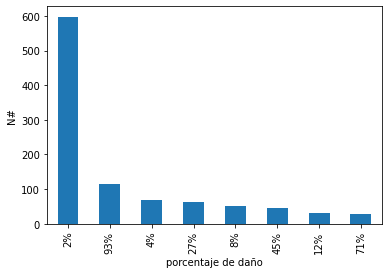

In [35]:
#Categorizar la variable según la escala diagramtica del articulo referencia
cat_s = []
for pe_i in df_s['porcentaje_daño']:
  if(pe_i <=2):
    cat_s.append('2%')
  elif(pe_i <= 4):
    cat_s.append('4%')
  elif(pe_i <= 8):
    cat_s.append('8%')
  elif(pe_i <= 12):
    cat_s.append('12%')
  elif(pe_i <= 27):
    cat_s.append('27%')
  elif(pe_i <= 45):
    cat_s.append('45%')
  elif(pe_i <= 71):
    cat_s.append('71%')
  else:
    cat_s.append('93%')

cat_enf_serie = pd.Series(cat_s)
cat_enf_serie.value_counts().plot(kind='bar',xlabel='porcentaje de daño', ylabel='N#') 

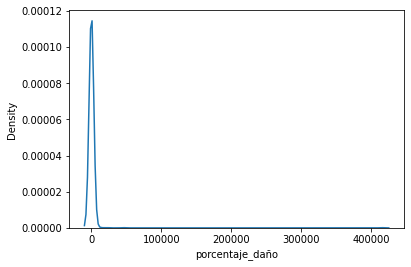

In [38]:
sns.kdeplot(df_s['porcentaje_daño'])

---
Clase  de python

In [ ]:
serie1 = pd.Series(['Fresa', 'Mora', 'Pera', 'Mango'])
type(serie1)
serie1

0    Fresa
1     Mora
2     Pera
3    Mango
dtype: object

In [ ]:
print(serie1.shape)
print(serie1.size)

(4,)
4


In [ ]:
serie2 = pd.Series(
    {
        'Fresa':3000,
     'Mora':2500,
     'Pera':2700,
     'Mango':1800
    }
)
serie2

Fresa    3000
Mora     2500
Pera     2700
Mango    1800
dtype: int64

In [ ]:
type(serie2)

pandas.core.series.Series

In [ ]:
serie2.shape

(4,)

In [ ]:
serie2.index

Index(['Fresa', 'Mora', 'Pera', 'Mango'], dtype='object')

In [ ]:
print(serie2[0])
print(serie2['Fresa'])

3000
3000


In [ ]:
serie2.sum()

10000

In [ ]:
serie2.cumsum()

Fresa     3000
Mora      5500
Pera      8200
Mango    10000
dtype: int64

In [ ]:
print(serie2.min())
print(serie2.max())
print(serie2.mean())
print(serie2.std())

1800
3000
2500.0
509.9019513592785


In [ ]:


np.random.seed(123)

pcp = np.random.random(30)*10
pcp_serie = pd.Series(pcp)
pcp_serie

0     6.964692
1     2.861393
2     2.268515
3     5.513148
4     7.194690
5     4.231065
6     9.807642
7     6.848297
8     4.809319
9     3.921175
10    3.431780
11    7.290497
12    4.385722
13    0.596779
14    3.980443
15    7.379954
16    1.824917
17    1.754518
18    5.315514
19    5.318276
20    6.344010
21    8.494318
22    7.244553
23    6.110235
24    7.224434
25    3.229589
26    3.617887
27    2.282632
28    2.937140
29    6.309761
dtype: float64

In [ ]:
pcp_serie.describe()

count    30.000000
mean      4.983096
std       2.258412
min       0.596779
25%       3.280137
50%       5.062416
75%       6.935593
max       9.807642
dtype: float64

In [ ]:
serie_temp_min = pd.Series(np.random.uniform(4, 10, 30))
serie_temp_max = pd.Series(np.random.uniform(17, 22, 30))
serie_dia = pd.Series(np.arange(1, 31, 1))

In [ ]:
df1 = pd.DataFrame(
    {
        'temp_min':serie_temp_min,
        'temp_max':serie_temp_max,
        'dia':serie_dia
    }
)
print(type(df1))
df1.head()

<class 'pandas.core.frame.DataFrame'>


,temp_min,temp_max,dia
0,4.552630,20.346569,1
1,6.602207,19.929683,2
2,6.585177,20.124518,3
3,6.962111,20.373445,4
4,6.554982,21.211712,5


In [ ]:
df1.describe()

,temp_min,temp_max,dia
count,30.000000,30.000000,30.000000
mean,7.073958,19.430973,15.500000
std,1.463612,1.364626,8.803408
min,4.552630,17.080646,1.000000
25%,6.164677,18.294709,8.250000
50%,6.930158,19.823105,15.500000
75%,7.727130,20.438250,22.750000
max,9.913359,21.625662,30.000000


In [ ]:
np.random.seed(2020)
porc_enf = np.random.exponential(1/10, 30)*100
porc_enf

array([42.88669551, 20.66659152,  7.12830686,  3.17228589,  4.10857714,
        2.44564175,  3.23623141,  4.2055173 , 19.81653964,  1.70432121,
        1.51855102, 14.15024263, 13.33037684,  4.3953354 ,  4.17172902,
       10.99021524,  2.44751121,  8.24228964,  1.32593293,  3.85275033,
       30.62168555,  1.47754104,  8.4260611 , 37.15859481,  6.99904079,
       11.01609394,  0.34789703,  6.0902548 ,  1.69426689,  6.46357047])

In [ ]:
print(porc_enf.min())
print(porc_enf.max())

0.34789702531525246
42.8866955085488


In [ ]:
cat_enf = []
for pe_i in porc_enf:
  if(pe_i == 0):
    cat_enf.append('N0')
  elif(pe_i <= 2.5):
    cat_enf.append('N1')
  elif(pe_i <= 5):
    cat_enf.append('N2')
  elif(pe_i <= 10):
    cat_enf.append('N3')
  elif(pe_i <= 20):
    cat_enf.append('N4')
  elif(pe_i <= 40):
    cat_enf.append('N5')
  elif(pe_i <= 80):
    cat_enf.append('N6')
  else:
    cat_enf.append('N7')

cat_enf_serie = pd.Series(cat_enf)

In [ ]:
cat_enf_serie.describe()

count     30
unique     6
top       N1
freq       8
dtype: object

In [ ]:
cat_enf_serie.value_counts()

N1    8
N2    7
N3    6
N4    5
N5    3
N6    1
dtype: int64

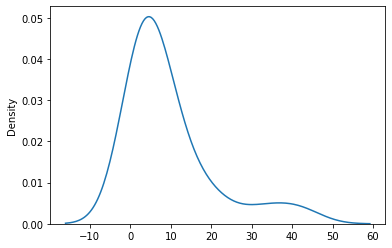

In [ ]:

sns.kdeplot(porc_enf)

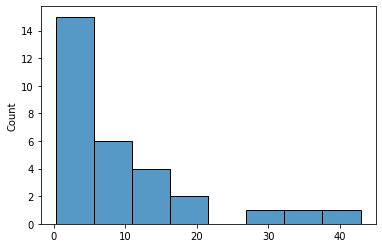

In [ ]:
sns.histplot(porc_enf)

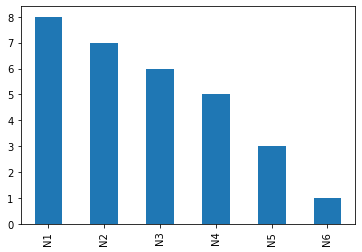

In [ ]:
cat_enf_serie.value_counts().plot(kind='bar')

In [ ]:
porc_enf.mean()

9.469688297296576

In [ ]:
np.median(porc_enf)

5.242795098033749

In [ ]:
porc_enf_serie = pd.Series(porc_enf)

In [ ]:
porc_enf_serie.quantile([0.24, 0.75, 0.90, 0.95])

0.24     2.447436
0.75    11.009624
0.90    21.662101
0.95    34.216986
dtype: float64

In [ ]:
cont = cat_enf_serie.value_counts()

# Con el punto de corte real
frec1 = cont*[2.5, 5, 10, 20, 40, 80]
print(frec1.sum()/30)

# Con el punto medio
frec2 = cont*[1.25, 3.75, 7.50, 15, 30, 60]
print(frec2.sum()/30)

# Punto percentil 20%
frec3 = cont*[0.50, 3.0, 6.0, 12.0, 24.0, 48.0]
print(frec3.sum()/30)

13.833333333333334
10.208333333333334
8.033333333333333
